### Import libraries

In [60]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score\

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings("ignore")

### 1. Problem Statement

In [ ]:
To Predict whether the customer is el;igible for Personal Lona or not.

### 2. Data Gathering

In [63]:
df = pd.read_csv("bankloan.csv")
df.head()

ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [64]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

### 3. EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
#  Checking null values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
df.drop(["ID", "ZIP.Code"], axis = 1, inplace = True)

#### cheking outliers 

##### 3.1 Age

In [22]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account',
       'Online', 'CreditCard'],
      dtype='object')

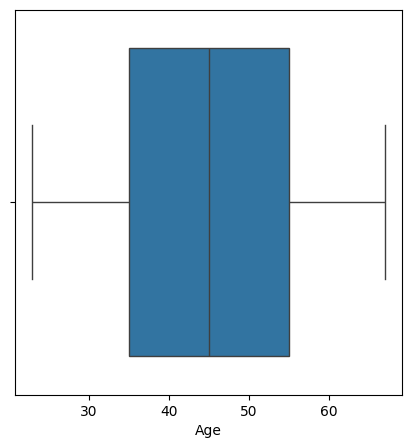

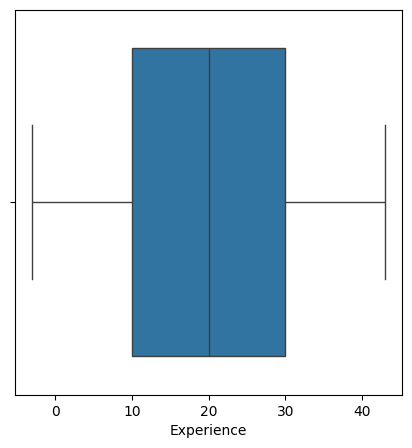

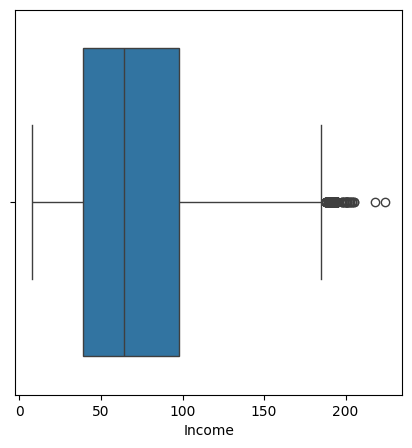

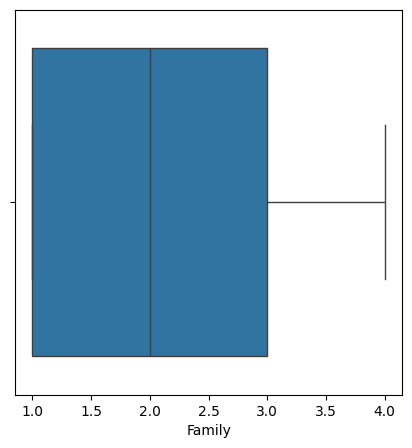

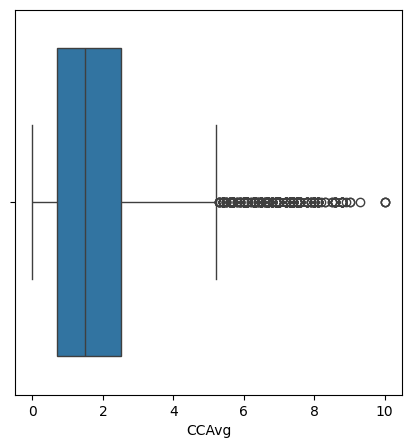

In [23]:
for col in df[['Age', 'Experience', 'Income', 'Family', 'CCAvg']]:
    plt.figure(figsize= (5, 5))
    sns.boxplot(x = df[col])
    plt.show()

### 4. Feature Engineering

#### 4.1. Income

In [24]:
# Handling outliers by using outliers
q3 = df['Income'].quantile(0.75)
q1 = df['Income'].quantile(0.25)

IQR = q3 - q1

lower_tail = q1 - (1.5 * IQR)
upper_tail = q3 + (1.5 * IQR)

outliers_index = np.where(df['Income'] > upper_tail)
print(outliers_index)

(array([  18,   47,   53,   59,  303,  329,  459,  526,  677,  740,  779,
        782,  787,  914,  917,  940, 1014, 1067, 1084, 1097, 1130, 1167,
       1204, 1277, 1307, 1320, 1395, 1432, 1504, 1551, 1552, 1592, 1637,
       1666, 1704, 1711, 1716, 1719, 1783, 1785, 1824, 1901, 1912, 1935,
       2087, 2101, 2196, 2215, 2246, 2278, 2319, 2337, 2447, 2646, 2704,
       2753, 2841, 2859, 2904, 2934, 2956, 2988, 3124, 3312, 3351, 3458,
       3483, 3543, 3568, 3608, 3639, 3758, 3804, 3821, 3896, 3943, 4009,
       4020, 4042, 4122, 4156, 4225, 4267, 4282, 4292, 4309, 4484, 4563,
       4574, 4606, 4655, 4659, 4670, 4895, 4981, 4993], dtype=int64),)


In [29]:
df['Income'].iloc[outliers_index] = upper_tail
df['Income'].iloc[outliers_index]

18      186.5
47      186.5
53      186.5
59      186.5
303     186.5
        ...  
4659    186.5
4670    186.5
4895    186.5
4981    186.5
4993    186.5
Name: Income, Length: 96, dtype: float64

<Axes: xlabel='Income'>

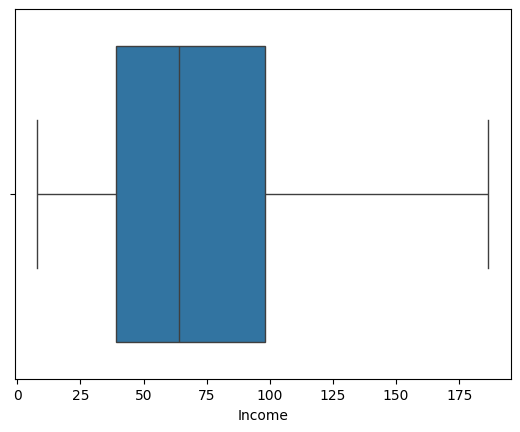

In [30]:
sns.boxplot(x = df['Income'])

#### 4.2 CCAvg

In [31]:
# Handling outliers by using outliers
q3 = df['CCAvg'].quantile(0.75)
q1 = df['CCAvg'].quantile(0.25)

IQR = q3 - q1

lower_tail = q1 - (1.5 * IQR)
upper_tail = q3 + (1.5 * IQR)

outliers_index = np.where(df['CCAvg'] > upper_tail)
print(outliers_index)

(array([   9,   18,   44,   55,   61,   90,  131,  145,  150,  151,  160,
        172,  174,  194,  213,  227,  243,  251,  299,  301,  302,  311,
        324,  329,  348,  351,  361,  365,  389,  400,  422,  423,  432,
        462,  463,  474,  475,  479,  494,  509,  526,  544,  554,  570,
        577,  589,  597,  614,  615,  636,  641,  681,  703,  704,  725,
        730,  740,  770,  779,  782,  783,  784,  785,  787,  800,  805,
        807,  834,  881,  891,  909,  915,  917,  935,  952, 1008, 1023,
       1038, 1050, 1064, 1079, 1084, 1116, 1125, 1149, 1163, 1190, 1192,
       1220, 1237, 1244, 1273, 1277, 1304, 1307, 1321, 1328, 1339, 1349,
       1354, 1408, 1411, 1431, 1432, 1447, 1495, 1498, 1520, 1521, 1541,
       1592, 1600, 1603, 1626, 1629, 1637, 1651, 1652, 1695, 1696, 1704,
       1711, 1716, 1719, 1752, 1765, 1768, 1792, 1797, 1824, 1825, 1830,
       1843, 1868, 1884, 1890, 1901, 1918, 1962, 1994, 2005, 2014, 2038,
       2041, 2046, 2059, 2076, 2077, 2087, 2101, 2

In [34]:
df['CCAvg'].iloc[outliers_index] = np.nan

In [35]:
df['CCAvg'].isna().sum()

324

<Axes: xlabel='CCAvg'>

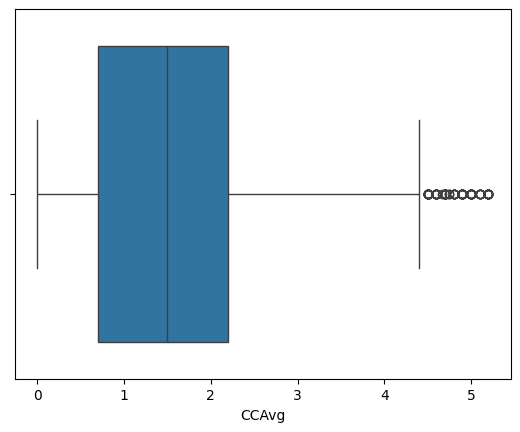

In [37]:
knn_imputer = KNNImputer(n_neighbors=2)
array1 = knn_imputer.fit_transform(df[['CCAvg']])
df['CCAvg'] = array1
sns.boxplot(x = df['CCAvg'])

In [38]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal.Loan  \
0   25           1    49.0       4    1.6          1         0              0   
1   45          19    34.0       3    1.5          1         0              0   
2   39          15    11.0       1    1.0          1         0              0   
3   35           9   100.0       1    2.7          2         0              0   
4   35           8    45.0       4    1.0          2         0              0   

   Securities.Account  CD.Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

### 5. Model training

#### Train Test Split

In [39]:
x = df.drop('Personal.Loan', axis = 1)
y = df['Personal.Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1, stratify= y)

# Logistic Regression

In [40]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [41]:
# Training Data Evaluation
y_pred_train = log_reg.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3343   47]
 [ 126  234]]
**************************************************
Accuracy: 0.9538666666666666
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3390
           1       0.83      0.65      0.73       360

    accuracy                           0.95      3750
   macro avg       0.90      0.82      0.85      3750
weighted avg       0.95      0.95      0.95      3750



In [42]:
# Testing Data Evaluation
y_pred_test = log_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1114   16]
 [  46   74]]
**************************************************
Accuracy: 0.9504
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1130
           1       0.82      0.62      0.70       120

    accuracy                           0.95      1250
   macro avg       0.89      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250



# KNN Classfication

### Scaling

In [43]:
x = df.drop('Personal.Loan', axis = 1)
y = df['Personal.Loan']


In [44]:
std_scalar = StandardScaler()
array1 = std_scalar.fit_transform(x)
array1.shape

(5000, 11)

In [45]:
x = pd.DataFrame(array1, columns = x.columns)
x.head()

Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
0 -1.774417   -1.666078 -0.539600  1.397414  0.001806  -1.049078 -0.555524   
1 -0.029524   -0.096330 -0.868392  0.525991 -0.085160  -1.049078 -0.555524   
2 -0.552992   -0.445163 -1.372540 -1.216855 -0.519990  -1.049078 -0.555524   
3 -0.901970   -0.968413  0.578292 -1.216855  0.958432   0.141703 -0.555524   
4 -0.901970   -1.055621 -0.627278  1.397414 -0.519990   0.141703 -0.555524   

   Securities.Account  CD.Account    Online  CreditCard  
0            2.928915    -0.25354 -1.216618   -0.645314  
1            2.928915    -0.25354 -1.216618   -0.645314  
2           -0.341423    -0.25354 -1.216618   -0.645314  
3           -0.341423    -0.25354 -1.216618   -0.645314  
4           -0.341423    -0.25354 -1.216618    1.549632

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1, stratify= y)

In [47]:
knn_clf = KNeighborsClassifier(n_neighbors=6, p = 1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [48]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3386    4]
 [ 151  209]]
**************************************************
Accuracy: 0.9586666666666667
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3390
           1       0.98      0.58      0.73       360

    accuracy                           0.96      3750
   macro avg       0.97      0.79      0.85      3750
weighted avg       0.96      0.96      0.95      3750



In [49]:
# Testing Data Evaluation
y_pred_test = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1128    2]
 [  64   56]]
**************************************************
Accuracy: 0.9472
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1130
           1       0.97      0.47      0.63       120

    accuracy                           0.95      1250
   macro avg       0.96      0.73      0.80      1250
weighted avg       0.95      0.95      0.94      1250



#### Best k Values 

Text(0, 0.5, 'Accuracy')

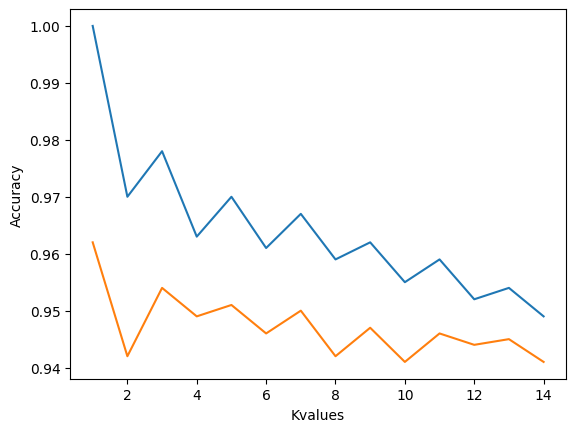

In [50]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors= k, p = 2)
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train), 3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test), 3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

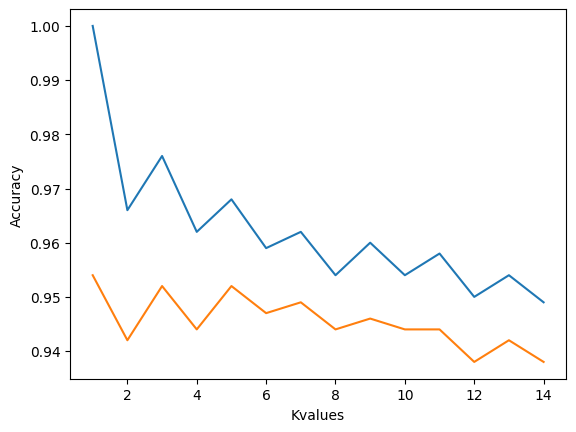

In [51]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors= k, p = 1)
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train), 3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test), 3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

# Decision Treee classification

In [52]:
dt_clf = DecisionTreeClassifier(random_state = 1)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
plt.figure(figsize=(100, 90))
tree = plot_tree(dt_clf, feature_names= x.columns, filled = True)
plt.savefig("DT_clf.png")

In [54]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3390    0]
 [   0  360]]
**************************************************
Accuracy: 1.0
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3390
           1       1.00      1.00      1.00       360

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [55]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1114   16]
 [  15  105]]
**************************************************
Accuracy: 0.9752
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.87      0.88      0.87       120

    accuracy                           0.98      1250
   macro avg       0.93      0.93      0.93      1250
weighted avg       0.98      0.98      0.98      1250



### Hyper parameter tuning

In [56]:
dt_clf = DecisionTreeClassifier(random_state=1)

hyp_grid = { "criterion" :['gini','entropy'],
             "max_depth" : np.arange(5,10),
             "min_samples_split" : range(10,15),
             "min_samples_leaf" : range(3,8)}

gscv_dt_clf = GridSearchCV(dt_clf, param_grid= hyp_grid, cv = 3, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(10, 15)})

In [57]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=1)

In [58]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=1)

In [59]:
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy :",dt_clf.score(x_test, y_test))
plt.figure(figsize = (100,90))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_test.png')

Train Accuracy : 0.9882666666666666
Test Accuracy : 0.9816


# Random Forest Classification

In [84]:
rf_clf = RandomForestClassifier(n_estimators=30, criterion= "gini", random_state= 1)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=1)

In [85]:
# Training Data Evaluation
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3390    0]
 [   1  359]]
**************************************************
Accuracy: 0.9997333333333334
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3390
           1       1.00      1.00      1.00       360

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [86]:
# Testing Data Evaluation
y_pred_test = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1128    2]
 [  13  107]]
**************************************************
Accuracy: 0.988
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.98      0.89      0.93       120

    accuracy                           0.99      1250
   macro avg       0.99      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



# Adaboost

In [87]:
adb_clf = AdaBoostClassifier(random_state=10,
                            n_estimators=70,
                            learning_rate=1.0)
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=70, random_state=10)

In [88]:
# Training Data Evaluation
y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :', accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[3362   28]
 [  64  296]]
Accuracy : 0.9754666666666667
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3390
           1       0.91      0.82      0.87       360

    accuracy                           0.98      3750
   macro avg       0.95      0.91      0.93      3750
weighted avg       0.97      0.98      0.97      3750



In [89]:
# Testing Data Evaluation
y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1118   12]
 [  22   98]]
Accuracy : 0.9728
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1130
           1       0.89      0.82      0.85       120

    accuracy                           0.97      1250
   macro avg       0.94      0.90      0.92      1250
weighted avg       0.97      0.97      0.97      1250



### Best Model

In [61]:
with open('Decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_clf, f)